# Speedy Tuk Tuk Market Analysis

### Speedy Tuk Tuk is an awesome organization that helps Tuk Tuk drivers (small 3 wheel taxis) escape the poverty trap of daily renting Tuk Tuks for work in Madagascar. The company is wondering if there are other countries that their business model could work in.  Learn more here: http://www.speedytuktuk.com/

### While it is easy to search online "Top countries for Tuk Tuks", my purpose in doing this analsys is to find what countries are closest to Madagascar on a range of economic indicators, which will effectively point to markets that are more likely to have a similar poverty trap that is found in Madagascar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, I tried using the HS Code for tuk tuks to gather import data from UN Comtrade, but it captures cars and other vehicles sent to highly developed nations, so it isn't useful.

In [2]:
# comtrade = pd.read_csv('comtrade (10).csv')
# comtrade

In [3]:
# import_data = pd.pivot_table(comtrade, index=['Reporter'], values=['Trade Value (US$)'], columns=['Year']).fillna(0)

In [4]:
# import_data['Average'] = import_data.mean(axis=1)
# # import_data.sort_values('Average', ascending=False)
# import_data = import_data.reset_index()

In [5]:
# import_data.sort_values('Average', ascending=False)

By the way, googling "Top countries for Tuk Tuks" returns the following countries: Bangladesh, Egypt, India, Nigeria, Peru,  Sri Lanka and Thailand. It will be interesting to see how my results are different.

# Importing and Cleaning Data

The data I chose to use is the Human Development Index created by the United Nations Development Programme (http://hdr.undp.org/en/content/human-development-index-hdi) and the 2019 Index of Economic Freedom by the Heritage Foundation (https://www.heritage.org/index/ranking). 

In [6]:
hdi = pd.read_csv('Human Development Index (HDI).csv', encoding= 'unicode_escape')

In [7]:
hdi = hdi[['HDI Rank', 'Country', '2016', '2017', '2018']][1:]
hdi = hdi[:189]
hdi["2016"] = pd.to_numeric(hdi["2016"],errors='coerce')
hdi["2017"] = pd.to_numeric(hdi["2017"],errors='coerce')
hdi["2018"] = pd.to_numeric(hdi["2018"],errors='coerce')
hdi = hdi.drop(columns=['HDI Rank'])
hdi['HDIAverage'] = hdi.mean(axis=1)
hdi['HDIChange'] = hdi['2018'] - hdi['2016']
hdi = hdi.drop(['2016', '2017', '2018'], axis=1)

In [8]:
heritage = pd.read_excel('index2019_data (2).xls', encoding= 'unicode_escape')
heritage = heritage.drop(['CountryID', 'Region', 'WEBNAME','Country Name', 'World Rank', 'Region Rank'], axis=1)

In [9]:
heritage["GDP per Capita (PPP)"] = pd.to_numeric(heritage["GDP per Capita (PPP)"],errors='coerce')
heritage["Unemployment (%)"] = pd.to_numeric(heritage["Unemployment (%)"],errors='coerce')
heritage["Population (Millions)"] = pd.to_numeric(heritage["Population (Millions)"],errors='coerce')
heritage["GDP (Billions, PPP)"] = pd.to_numeric(heritage["GDP (Billions, PPP)"],errors='coerce')

In [10]:
hdi['Country'] = hdi['Country'].map(lambda x: x.strip())
heritage['Country'] = heritage['Country'].map(lambda x: x.strip())

In [11]:
rename_dict = {
    'Russian Federation' : 'Russia',
    'Russia' : 'Russia', #No idea why, but this fixed a matching problem...
    'Hong Kong SAR' : 'Hong Kong',
    'Korea, South' : 'South Korea',
    'Korea (Republic of)' : 'South Korea',
    'Korea, North' : 'North Korea',
    'Hong Kong SAR' : 'Hong Kong',
    'Hong Kong, China (SAR)' : 'Hong Kong',
    'Iran (Islamic Republic of)' : 'Iran',
    'Lao P.D.R.' : 'Lao',
    'Lao People\'s Democratic Republic' : 'Lao',
    'Moldova (Republic of)' : 'Moldova',
    'Bolivia (Plurinational State of)' : 'Bolivia',
    'Burma' : 'Myanmar',
    'Czechia' : 'Czech Republic', 
    'Congo, Republic of' : 'Congo',
    'Congo, Democratic Republic of the Congo' : 'Congo (Democratic Republic of the)',
    'Eswatini (Kingdom of)' : 'Eswatini',
    'Kyrgyz Republic' : 'Kyrgyzstan',
    'Micronesia (Federated States of)' : 'Micronesia',
    'Moldova (Republic of)' :  'Moldova',
    'São Tomé and Príncipe' : 'Sao Tome and Principe',
    'Syrian Arab Republic' : 'Syria',
    'Venezuela (Bolivarian Republic of)' : 'Venezuela',
    'Viet Nam' : 'Vietnam',
    'Slovak Republic' : 'Slovakia',
    'Tanzania (United Republic of)' : 'Tanzania',
}

Yes... This did take forever to make. If you have any suggetions to make this easier let me know.  

In [12]:
hdi = hdi.set_index(['Country'])
new = pd.DataFrame(hdi.rename(rename_dict).index)
hdi = hdi.reset_index()
hdi['Country'] = new 

In [13]:
heritage = heritage.set_index(['Country'])
new = pd.DataFrame(heritage.rename(rename_dict).index)
heritage = heritage.reset_index()
heritage['Country'] = new 

In [14]:
df = hdi.merge(heritage, how='right', on='Country')

Underdeveloped countries have more NaNs since it is hard to get data on them. I tried to be thoughtful in how I dealt with this. Averages of the countries with NaNs seemed a good option. 

In [15]:
nans = df[df.isna().any(axis=1)]
nans = nans.drop([96, 180, 156, 184], axis=0)
averages = nans.mean(axis=0)

In [16]:
for i in range(len(averages)):
    df[df.columns[i]] = df[df.columns[i]].fillna(averages[i-1])  

In [17]:
df = df.drop([96, 180, 156, 184], axis=0) #These were dropped because they are unrealistic outliers like North Korea and Syria

In [18]:
X = df.drop(['Country'], axis=1)

In [33]:
df #Cleaned Data

,Country,HDIAverage,HDIChange,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Afghanistan,0.493333,0.00500,51.500000,19.6,29.6,25.2,91.700000,80.3,99.3,...,25.600000,35.5,69.6,2.505,2.9,1957.58,8.8,5.0,53.9,7.3
1,Albania,0.789333,0.00300,66.500000,54.8,30.6,40.4,86.300000,73.9,80.6,...,29.500000,2.9,36.0,3.900,2.5,12506.65,13.9,2.0,1119.1,71.2
2,Algeria,0.757333,0.00400,46.200000,31.6,36.2,28.9,76.400000,48.7,18.7,...,41.400000,41.5,632.9,2.000,3.1,15237.20,10.0,5.6,1203.0,25.8
3,Angola,0.573333,0.00400,50.600000,35.9,26.6,20.5,83.900000,80.7,58.2,...,25.300000,28.2,190.3,0.700,2.9,6752.58,8.2,31.7,-2254.5,65.3
4,Argentina,0.830000,0.00200,52.200000,47.8,44.5,33.5,69.300000,49.5,33.0,...,41.000000,44.1,920.2,2.900,0.7,20875.76,8.7,25.7,11857.0,52.6
5,Armenia,0.756333,0.00900,67.700000,57.2,46.3,38.6,84.700000,79.0,53.0,...,26.400000,3.0,28.3,7.500,3.6,9455.94,18.2,0.9,245.7,53.5
6,Australia,0.936667,0.00300,80.900000,79.1,86.5,79.9,62.800000,60.1,86.2,...,36.500000,24.8,1246.5,2.300,2.4,50333.71,5.6,2.0,46368.0,41.6
7,Austria,0.911667,0.00500,72.000000,84.2,71.3,77.4,50.500000,24.5,85.5,...,50.200000,8.8,439.6,2.900,1.3,49868.71,5.5,2.2,9629.6,78.8
8,Azerbaijan,0.751667,0.00500,65.400000,59.1,53.1,44.7,87.500000,59.5,89.4,...,36.700000,9.8,171.8,0.100,1.2,17492.36,5.0,13.0,2867.0,54.7
9,Bahamas,0.803000,0.00500,62.900000,42.2,46.9,43.7,97.300000,86.8,65.7,...,21.000000,0.4,11.6,1.300,-0.7,31139.37,12.6,1.4,927.7,57.2


### Principle Component Analysis

Full disclosure I did copy some of the code for pca from stat quest. Not sure why but we never went past the .fit step in the ML class I took...

In [20]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [21]:
index_vars = df['Country']
scaled = preprocessing.scale(X)

In [22]:
pca=PCA()
pca.fit(scaled)
pca_data = pca.transform(scaled)

In [23]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)

In [24]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

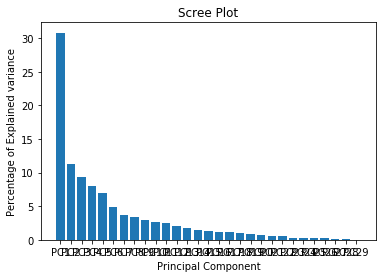

In [25]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [26]:
pca_df = pd.DataFrame(pca_data, index=index_vars, columns=labels)

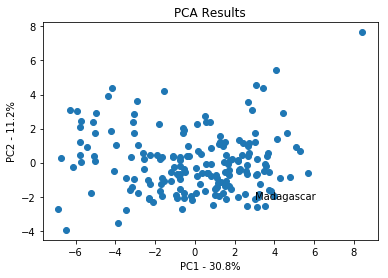

In [27]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Results')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# for sample in pca_df.index:
#     plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
# This labels all countries.

plt.annotate('Madagascar', (pca_df.PC1.loc['Madagascar'], pca_df.PC2.loc['Madagascar']))
    
plt.show()

PCA Shows that these various indicators are or are not high correlated with eachother, based on the location. 

In [28]:
norm = pca_df.copy()

In [29]:
for i in range(norm.shape[1]):
    norm['PC' + str(i+1)] = norm['PC' + str(i+1)] - norm['PC' + str(i+1)].loc['Madagascar']

In [30]:
final_list = norm[(abs(norm['PC1']) < 1) & (abs(norm['PC2']) < 1)]

In [31]:
final_list
final_list['distance'] = abs(final_list['PC1']) + abs(final_list['PC2'])

C:\Users\camer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
final_list = final_list['distance']

In [35]:
final_list = final_list.reset_index()
num_countries = final_list.shape[0]
final_list.sort_values('distance')

,Country,distance
5,Madagascar,0.000000
8,Nigeria,0.237125
1,Bangladesh,0.460749
6,Myanmar,0.610506
11,Uzbekistan,0.813289
2,Cambodia,0.832180
10,Turkmenistan,0.932995
9,Tanzania,0.943479
7,Nepal,1.121201
0,Afghanistan,1.125948


In [36]:
final_list = final_list.merge(df[['Country', 'Population (Millions)']], how='right', on='Country')[:num_countries]

In [37]:
final_list.sort_values('distance')

,Country,distance,Population (Millions)
5,Madagascar,0.000000,25.6
8,Nigeria,0.237125,188.7
1,Bangladesh,0.460749,163.2
6,Myanmar,0.610506,52.6
11,Uzbekistan,0.813289,32.1
2,Cambodia,0.832180,16.0
10,Turkmenistan,0.932995,5.7
9,Tanzania,0.943479,50.0
7,Nepal,1.121201,29.3
0,Afghanistan,1.125948,35.5


Here is the list from google: Bangladesh, Egypt, India, Nigeria, Peru, Sri Lanka and Thailand

Looks like we have some matches! I think overall I succeeded in identifying countries economically and socially similar to Madagascar. If you have any recommendations or thoughts feel free to let me know! cameroncorbridge@gmail.com